<a href="https://colab.research.google.com/github/sriramreddy-7/DAFE_ML/blob/main/DAFE_CODE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
dataset = pd.read_csv('/content/newdata_999.csv')
dataset = dataset.drop('instagram_name', axis=1)
print(dataset)
X = dataset.drop('revenue', axis=1)
y = dataset['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

     Subscribers_count  Likes_avg  Comments_avg.  Country   Eng_avg  \
0             50700000     274900         456700        1  0.014430   
1              3600000     449400         592700        2  0.289472   
2             13400000     269600         304100        2  0.042813   
3             18600000     164400         189400        3  0.019022   
4              3500000     525100         643000        4  0.333743   
..                 ...        ...            ...      ...       ...   
988           33000000     412400         560800        7  0.029491   
989           33000000     412400         560800        7  0.029491   
990           14100000    1400000        1700000        7  0.219858   
991           14000000     145800         262000        2  0.029129   
992            8500000     342400         519299       24  0.101376   

         revenue    cpm  
0     8910888.00  12.18  
1     1563150.00   1.50  
2      860550.00   1.50  
3       88450.00   0.25  
4     7826270.00 

In [ ]:
dataset.describe()

,Subscribers_count,Likes_avg,Comments_avg.,Country,Eng_avg,revenue,cpm
count,9.930000e+02,9.930000e+02,9.930000e+02,993.000000,993.000000,9.930000e+02,993.000000
mean,2.598338e+07,5.586249e+05,7.500768e+05,8.044310,0.099719,4.565361e+06,3.451484
std,4.358856e+07,8.892180e+05,1.040932e+06,8.231164,0.120141,1.055162e+07,3.462520
min,2.200000e+06,0.000000e+00,3.860000e+04,1.000000,0.000590,8.960000e+03,0.140000
25%,8.900000e+06,1.690000e+05,2.487000e+05,4.000000,0.021235,3.144500e+05,0.520000
50%,1.420000e+07,3.252000e+05,4.567000e+05,5.000000,0.054409,1.395394e+06,1.500000
75%,2.570000e+07,6.248000e+05,8.379000e+05,8.000000,0.131647,5.164500e+06,6.700000
max,5.233000e+08,1.320000e+07,1.320000e+07,33.000000,0.800500,1.768800e+08,12.180000


In [ ]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [ ]:
svm = r2_score(y_test, y_pred)
print('svm=',svm)

svm= 0.5963544078578431


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
k = 5
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train_scaled, y_train)
y_pred = knn_regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
knn = r2_score(y_test, y_pred)
print('knn=',knn)

knn= 0.5963544078578431


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
lr = r2_score(y_test, y_pred)
print('Linear regression :',lr)

Linear regression : 0.7263891658514543


In [ ]:
n_estimators = 3
random_forest = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rf = r2_score(y_test, y_pred)
print('random forest : ',rf)

random forest :  0.8541571686607772


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_regression = LinearRegression()
poly_regression.fit(X_train_poly, y_train)
y_pred = poly_regression.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
poly = r2_score(y_test, y_pred)
print("polynomial regression : ",poly)

polynomial regression :  1.0


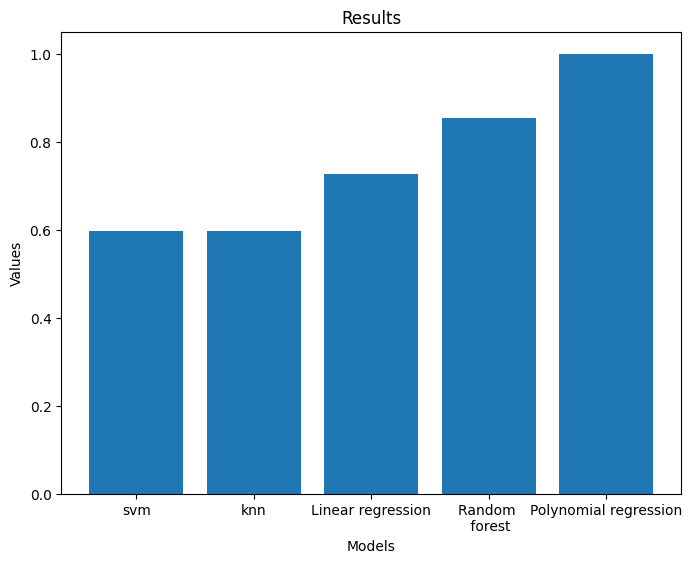

In [ ]:
import matplotlib.pyplot as plt
y = [svm,knn,lr,rf,poly]
x = ["svm","knn","Linear regression","Random \n forest","Polynomial regression"]
plt.figure(figsize=(8, 6))
plt.bar(x,y)
plt.xlabel("Models")
plt.ylabel("Values")
plt.title("Results")
plt.show()

In [ ]:
print(y)

0       8910888.00
1       1563150.00
2        860550.00
3         88450.00
4       7826270.00
          ...     
988     7882920.00
989     7882920.00
990    25110000.00
991      611700.00
992     3972432.39
Name: revenue, Length: 993, dtype: float64


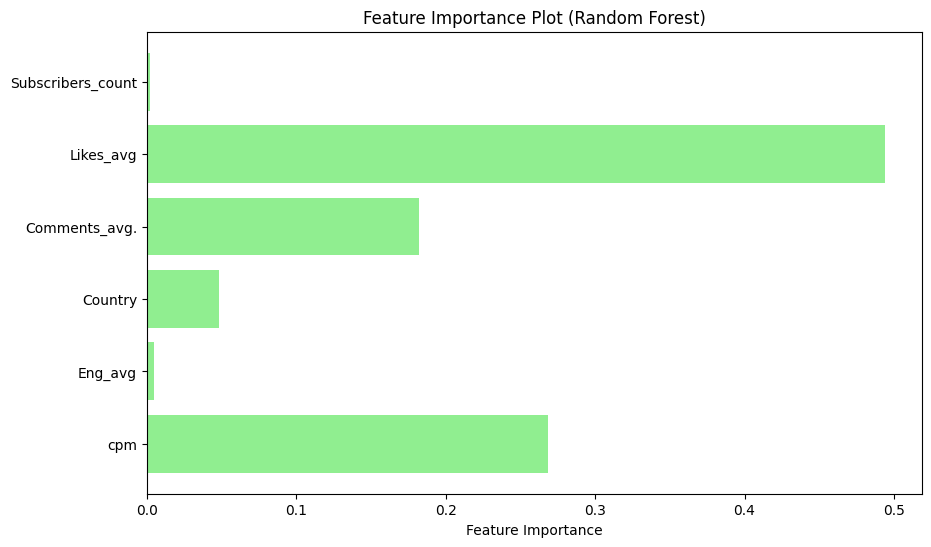

In [ ]:
feature_importances = random_forest.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='lightgreen')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot (Random Forest)')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
model_names = ["SVM", "KNN", "Linear Regression", "Random Forest", "Polynomial Regression"]
r2_scores = [svm, knn, lr, rf, poly]
mse_scores = [mean_squared_error(y_test, y_pred) for y_pred in [svr.predict(X_test), knn_regressor.predict(X_test_scaled), model.predict(X_test), random_forest.predict(X_test), poly_regression.predict(X_test_poly)]]
comparison_data = {'Model': model_names, 'R-squared': r2_scores, 'MSE': mse_scores}
comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

                   Model  R-squared           MSE
0                    SVM   0.596354  2.154713e+14
1                    KNN   0.596354  8.093444e+13
2      Linear Regression   0.726389  5.486135e+13
3          Random Forest   0.854157  2.924275e+13
4  Polynomial Regression   1.000000  1.844642e-14


In [ ]:
X_1 = dataset[['Subscribers_count', 'Likes_avg', 'Comments_avg.', 'Country', 'Eng_avg']]
y_1 = dataset['revenue']

In [ ]:
!pip install pybart

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
gbt = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {gbt}")

Mean Squared Error (MSE): 118923535697630.12
R-squared (R2): 0.40689082618892014


In [ ]:
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 123013996236475.28


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import numpy as np

In [ ]:
model_s = Sequential()
model_s.add(LSTM(128, input_shape=(X.shape[1], 1)))
model_s.add(Dense(1))
model_s.compile(optimizer='adam', loss='mse')
model_s.fit(X_1, y_1, epochs=0)
predictions = model_s.predict(X)
mse = np.mean((predictions - y)**2)
print('MSE:', mse)

32/32 [==============================] - 1s 5ms/step
MSE: 0.5227165610229166


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
alpha = 0.5
enet = ElasticNet(alpha=alpha, l1_ratio=0.5)
enet.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.225e+15, tolerance: 7.044e+12
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.5)

In [ ]:
y_pred = enet.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
estnet = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {estnet}")

Mean Squared Error: 54861346340408.01
R-squared: 0.7263891658514545


In [ ]:
dataset.describe()

,Subscribers_count,Likes_avg,Comments_avg.,Country,Eng_avg,revenue,cpm
count,9.930000e+02,9.930000e+02,9.930000e+02,993.000000,993.000000,9.930000e+02,993.000000
mean,2.598338e+07,5.586249e+05,7.500768e+05,8.044310,0.099719,4.565361e+06,3.451484
std,4.358856e+07,8.892180e+05,1.040932e+06,8.231164,0.120141,1.055162e+07,3.462520
min,2.200000e+06,0.000000e+00,3.860000e+04,1.000000,0.000590,8.960000e+03,0.140000
25%,8.900000e+06,1.690000e+05,2.487000e+05,4.000000,0.021235,3.144500e+05,0.520000
50%,1.420000e+07,3.252000e+05,4.567000e+05,5.000000,0.054409,1.395394e+06,1.500000
75%,2.570000e+07,6.248000e+05,8.379000e+05,8.000000,0.131647,5.164500e+06,6.700000
max,5.233000e+08,1.320000e+07,1.320000e+07,33.000000,0.800500,1.768800e+08,12.180000


In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
X = dataset[['Likes_avg', 'Comments_avg.', 'Eng_avg', 'cpm']]
y = dataset['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     302.7
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          1.10e-157
Time:                        04:35:42   Log-Likelihood:                -13508.
No. Observations:                 794   AIC:                         2.703e+04
Df Residuals:                     789   BIC:                         2.705e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.216e+06   3.64e+05    -11.582

In [ ]:
X_test = sm.add_constant(X_test)

predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
dar = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 3005430.3730200776
Mean Squared Error: 54719844198417.53
R-squared: 0.7263891658514545


In [ ]:
!pip install gpytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.1/266.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.6/175.6 kB 19.1 MB/s eta 0:00:00


In [ ]:
import torch
import gpytorch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
data=dataset

In [ ]:
X = data[['Subscribers_count', 'Likes_avg', 'Comments_avg.', 'Country', 'Eng_avg', 'cpm']].values
y = data['revenue'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

In [ ]:
class DKMModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(DKMModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.RBFKernel()
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = DKMModel(X_train, y_train, likelihood)

In [ ]:
model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = model(X_train)
    loss = -likelihood(output, y_train).log_prob(y_train).mean()
    loss.backward()
    optimizer.step()

In [ ]:
model.eval()
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    predictions = model(X_test)

mse = mean_squared_error(y_test, predictions.mean)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 158002863751429.03


In [ ]:
dkm = r2_score(y_test, predictions.mean)
print(f"R2 Score: {dkm:.2f}")

R2 Score: 0.21


In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
X = data[['Subscribers_count', 'Likes_avg', 'Comments_avg.', 'Country', 'Eng_avg', 'cpm']].values

y_2 = data[['revenue']].values

In [ ]:
y_2 = y_2.reshape(-1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_2, test_size=0.2, random_state=42)

In [ ]:
base_regressor = LinearRegression()
mtr_model = MultiOutputRegressor(base_regressor)
mtr_model.fit(X_train, y_train)

MultiOutputRegressor(estimator=LinearRegression())

In [ ]:
y_pred = mtr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mtr = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {mtr}')

Mean Squared Error: 54861346340408.01
R-squared: 0.7263891658514545


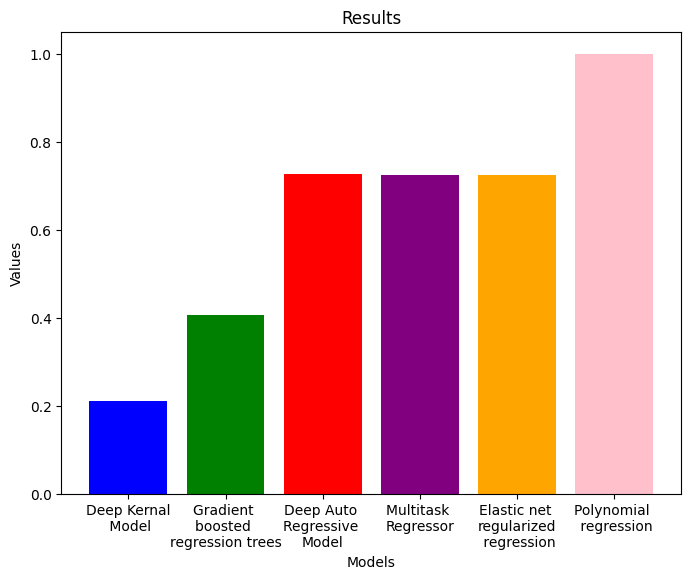

In [ ]:
import matplotlib.pyplot as plt
y = [dkm, gbt, dar, mtr, estnet, poly]

 = [
    "Deep Kernal\n Model",
    "Gradient \nboosted \nregression trees",
    "Deep Auto \nRegressive \nModel",
    "Multitask \nRegressor",
    "Elastic net \nregularized\n regression",
    "Polynomial \n regression",
]

colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink']
plt.figure(figsize=(8, 6))
plt.bar(x, y, color=colors)
plt.xlabel("Models")
plt.ylabel("Values")
plt.title("Results")
plt.show()